# Was The FED Wrong?

The goal of this project was for me to practice connecting to an API, download data, clean it, and present various graphs while telling a story. The story I chose was basically:

"After the financial crisis in 2008, the FED saved the day by lowering interest rates and printing money. But then they went on chasing the 2% inflation goal to an extent that it favours the rich and leaves the poor behind." 

Obviously I do not have enough data here in this presentation to prove if this is correct or not, but it makes for a more interesting story for presenting data. So the analysis below is by no means complete, so take the whole thing with a grain of salt. The focus is the coding.

## A note of the graphs:
The graphs are ment to be used in a Power Point presentation, so I formated and designed them for that purpose.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initiate full-fred
full-fred is an API I found on the FRED-website which I decided to use.

In [2]:
from full_fred.fred import Fred

In [3]:
fred = Fred('FRED API key.txt')

In [4]:
fred.get_api_key_file()

'FRED API key.txt'

In [5]:
fred.set_api_key_file('FRED API key.txt')

True

## Data-sets to load

In [6]:
# Load data
fed_funds_ef = fred.get_series_df('DFF')
treasury_10y = fred.get_series_df('DGS10')
monetary_b = fred.get_series_df('BOGMBASE')
non_farm = fred.get_series_df('PAYNSA')
nasdaq = fred.get_series_df('NASDAQCOM')
real_median_household_income = fred.get_series_df('MEHOINUSA672N')
unemp = fred.get_series_df('UNRATENSA')
real_median_household_income = fred.get_series_df('MEHOINUSA672N')
real_median_personal_income  = fred.get_series_df('MEPAINUSA672N')
cpi = fred.get_series_df('CPALTT01USM657N')
will5000 = fred.get_series_df('WILL5000INDFC')
eq_held_by_top1 = fred.get_series_df('WFRBST01122')
eq_held_by_bottom50 = fred.get_series_df('WFRBSB50203')
savings = fred.get_series_df('PSAVERT')

In [7]:
# Example of a dataset:
fed_funds_ef

,realtime_start,realtime_end,date,value
0,2022-07-23,2022-07-23,1954-07-01,1.13
1,2022-07-23,2022-07-23,1954-07-02,1.250
2,2022-07-23,2022-07-23,1954-07-03,1.250
3,2022-07-23,2022-07-23,1954-07-04,1.250
4,2022-07-23,2022-07-23,1954-07-05,0.88
...,...,...,...,...
24853,2022-07-23,2022-07-23,2022-07-17,1.58
24854,2022-07-23,2022-07-23,2022-07-18,1.58
24855,2022-07-23,2022-07-23,2022-07-19,1.58
24856,2022-07-23,2022-07-23,2022-07-20,1.58


In [8]:
fed_funds_ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24858 entries, 0 to 24857
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  24858 non-null  object
 1   realtime_end    24858 non-null  object
 2   date            24858 non-null  object
 3   value           24858 non-null  object
dtypes: object(4)
memory usage: 776.9+ KB


## Clean data

In [13]:
def clean_df4(df):
    # Keep only wanted columns
    df = df.loc[:,['date', 'value']]     
    
    # Make date into datetime, and set as index:
    df.loc[:,'date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    
    # Remove "." in data
    miss_inx = df.loc[df['value'] == "."].index
    df.drop(index=miss_inx, inplace=True)
    
    # Set 'value' to float:
    df['value'] = df['value'].astype(float)
    
    return df

In [28]:
C_fed_funds_ef = clean_df4(fed_funds_ef)
C_treasury_10y = clean_df4(treasury_10y)
C_monetary_b = clean_df4(monetary_b)
C_non_farm = clean_df4(non_farm)
C_nasdaq = clean_df4(nasdaq)
C_real_median_household_income = clean_df4(real_median_household_income)
C_unemp = clean_df4(unemp)
C_real_median_household_income = clean_df4(real_median_household_income)
C_real_median_personal_income = clean_df4(real_median_personal_income)
C_cpi = clean_df4(cpi)
C_will5000 = clean_df4(will5000)
C_eq_held_by_top1 = clean_df4(eq_held_by_top1)
C_eq_held_by_bottom50 = clean_df4(eq_held_by_bottom50)
C_savings = clean_df4(savings)

In [20]:
# PE-ratio of the stock-market. I found it as a CSV-file on the internet.
pe_ratio = pd.read_csv("sp500pe.csv")

In [21]:
pe_ratio.head()

,date,value
0,1927-12-01,15.9099
1,1928-01-01,14.8898
2,1928-02-01,14.6271
3,1928-03-01,16.3390
4,1928-04-01,15.8000


In [22]:
pe_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1134 non-null   object 
 1    value  1134 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.8+ KB


In [23]:
pe_ratio['date'] = pd.to_datetime(pe_ratio['date'])
pe_ratio = pe_ratio.set_index('date')

In [24]:
pe_ratio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1134 entries, 1927-12-01 to 2022-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    value  1134 non-null   float64
dtypes: float64(1)
memory usage: 17.7 KB


<AxesSubplot:xlabel='date'>

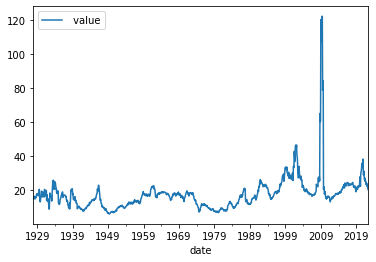

In [25]:
pe_ratio.plot()

# Change frequency from Daily to Monthly

In [26]:
def daily_to_monthly(df):
    df = df.resample("M").mean()
    return df

In [29]:
C_fed_funds_ef = daily_to_monthly(C_fed_funds_ef)
C_treasury_10y = daily_to_monthly(C_treasury_10y)
C_nasdaq = daily_to_monthly(C_nasdaq)
C_will5000 = daily_to_monthly(C_will5000)

# Plot Data

In [284]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use("default")

# Storytelling

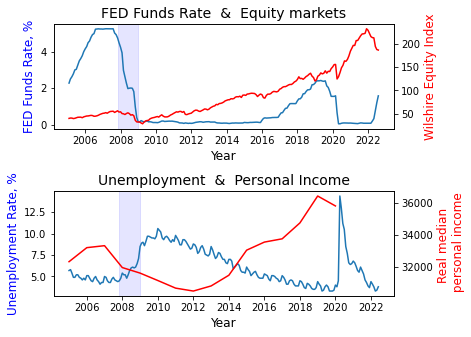

In [30]:

fig, (ax1, ax3) = plt.subplots(2,1, figsize=(7,5))

ax1.plot(C_fed_funds_ef["2005":"2022"])
ax2 = ax1.twinx()
ax2.plot(C_will5000["2005":"2022"], color="r")

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("FED Funds Rate, %", color='b', fontsize = 12)
ax2.set_ylabel("Wilshire Equity Index", color='r', fontsize=12)

plt.title("FED Funds Rate  &  Equity markets", fontsize=14)
ax1.axvspan("2007-11-01", "2009", color="blue", alpha=0.1) # Markera en speciell period i tidsserien



ax3.plot(C_unemp["2005":"2022"])
ax4 = ax3.twinx()
ax4.plot(C_real_median_personal_income["2005":"2022"], color="r")


ax3.set_xlabel("Year", fontsize=12)
ax3.set_ylabel("Unemployment Rate, %", color='b', fontsize = 12)
ax4.set_ylabel("Real median \n personal income", color='r', fontsize=12)


plt.title("Unemployment  &  Personal Income", fontsize=14)
ax3.axvspan("2007-11-01", "2009", color="blue", alpha=0.1)

plt.subplots_adjust(#left=0.1,
                    #bottom=0.1, 
                    right=0.8, 
                    #top=0.1, 
                    #wspace=0.1, 
                    hspace=0.6)
plt.savefig("Plot_1.png", transparent = True, dpi=200)
plt.show()

When the market crashed in 2008 the FED lowered interest rates, and by 2015, the recovery was done. Stock market had recovered, emplyment and sallaries were back to normal. So FED can focus on its primary objective: Inflation at 2%.

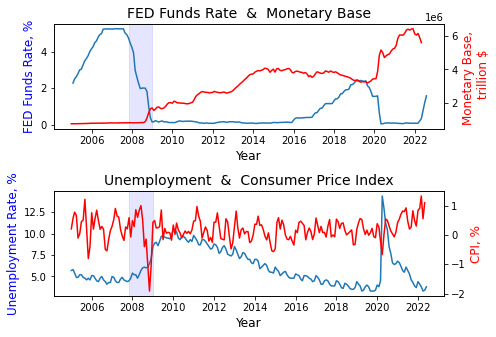

In [31]:

fig, (ax1, ax3) = plt.subplots(2,1, figsize=(7,5))

ax1.plot(C_fed_funds_ef["2005":"2022"])
ax2 = ax1.twinx()
ax2.plot(C_monetary_b["2005":"2022"], color="r")

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("FED Funds Rate, %", color='b', fontsize = 12)
ax2.set_ylabel("Monetary Base, \n trillion $", color='r', fontsize=12)

plt.title("FED Funds Rate  &  Monetary Base", fontsize=14)
ax1.axvspan("2007-11-01", "2009", color="blue", alpha=0.1) # Markera en speciell period i tidsserien



ax3.plot(C_unemp["2005":"2022"])
ax4 = ax3.twinx()
ax4.plot(C_cpi["2005":"2022"], color="r")


ax3.set_xlabel("Year", fontsize=12)
ax3.set_ylabel("Unemployment Rate, %", color='b', fontsize = 12)
ax4.set_ylabel("CPI, %", color='r', fontsize=12)

plt.title("Unemployment  &  Consumer Price Index", fontsize=14)
ax3.axvspan("2007-11-01", "2009", color="blue", alpha=0.1)

plt.subplots_adjust(#left=0.1,
                    #bottom=0.1, 
                    #right=0.8, 
                    #top=0.1, 
                    #wspace=0.1, 
                    hspace=0.6)
plt.savefig("Plot_2.png", transparent = True, dpi=200)
plt.show()

The FED lowered rates and printed money. They managed to bring unemployment down, but never managed to bring inflation up to 2%.

So what is the flow of money when the FED prints money:
FED buys Treasuries from institutions, which buy Stocks, easier for firms to Invest/expand -> higher Employment & Salaries
Lower mortgages & savings rates -> people spend more

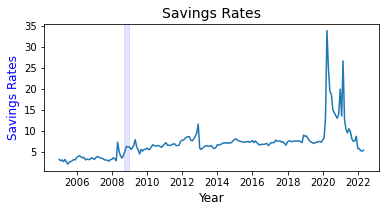

In [32]:
fig, ax1 = plt.subplots(figsize=(6,3))

ax1.plot(C_savings["2005":"2022"])

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Savings Rates", fontsize = 12, color='b')


plt.title("Savings Rates", fontsize=14)
ax1.axvspan("2008-09-15", "2009", color="blue", alpha=0.1) # Markera en speciell period i tidsserien

#ax1.legend()
plt.subplots_adjust(#left=0.1,
                    bottom=0.2) 
                    #right=0.8, 
                    #top=0.1, 
                    #wspace=0.1, 
                    #hspace=0.6)
plt.savefig("Plot_5.png", transparent = True, dpi=200)
plt.show()

But people did not really spend more, they increased their savins-rates instead. But why blame them? It is quite logical that people want to save more when they just have come out of a financial crisis, and have private balance-sheets to mend. So it is a bit taste-less that the FED pushes for a policy where they want people to spend more, when they need to save. 

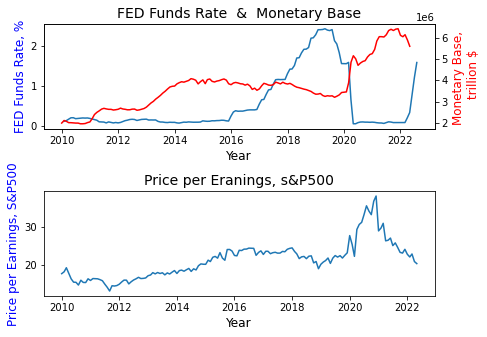

In [33]:

fig, (ax1, ax3) = plt.subplots(2,1, figsize=(7,5))

ax1.plot(C_fed_funds_ef["2010":"2022"])
ax2 = ax1.twinx()
ax2.plot(C_monetary_b["2010":"2022"], color="r")

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("FED Funds Rate, %", color='b', fontsize = 12)
ax2.set_ylabel("Monetary Base, \n trillion $", color='r', fontsize=12)

ax1.set_title("FED Funds Rate  &  Monetary Base", fontsize=14)


ax3.plot(pe_ratio["2010":"2022"])

ax3.set_xlabel("Year", fontsize=12)
ax3.set_ylabel("Price per Earnings, S&P500", color='b', fontsize = 12)

ax3.set_title("Price per Eranings, s&P500", fontsize=14)

plt.subplots_adjust(#left=0.1,
                    #bottom=0.1, 
                    #right=0.8, 
                    #top=0.1, 
                    #wspace=0.1, 
                    hspace=0.6)
plt.savefig("Plot_3.png", transparent = True, dpi=200)
plt.show()

So, all the money that the FED printed whent into the stock market and the bond market.

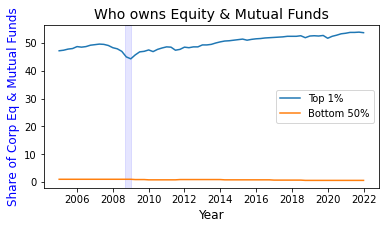

In [34]:

fig, ax1 = plt.subplots(figsize=(6,3))

ax1.plot(C_eq_held_by_top1["2005":"2022"], label="Top 1%")
ax1.plot(C_eq_held_by_bottom50["2005":"2022"], label="Bottom 50%")

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Share of Corp Eq & Mutual Funds", fontsize = 12, color='b')


plt.title("Who owns Equity & Mutual Funds", fontsize=14)
ax1.axvspan("2008-09-15", "2009", color="blue", alpha=0.1) # Markera en speciell period i tidsserien

ax1.legend()
plt.savefig("Plot_4.png", transparent = True, dpi=200)
plt.show()

Shares of corporate equity and mutual funds held by the top 1% have increased, and decreased for the bottom 50% of Americans. 

## THE END 